In [2]:
import os
import pandas as pd
import numpy as np
os.chdir("D:\\scrapy_northern")

In [3]:
data=pd.read_csv("NORTHWESTERN.csv")

In [4]:
data

,date,person,review,title
0,"November 8, 2017",Team Lead for Bitlocker Admin Tool for NWM,"Great company to grow..,Got many opportunities...",Productive
1,"June 5, 2019",Financial Planning Associate,"A typical day is very busy, more than half of ...",Busy
2,"June 4, 2019",Financial Representative,Northwestern <mutual tiene un buen producto pe...,"Buena compañia, mala sucursal"
3,"June 4, 2019",FINANCIAL ADVISOR,It's good if you want commission only and no b...,Great if you are motivated by commission
4,"June 4, 2019",Associate Financial Advisor,I really enjoyed working at Northwestern Mutua...,Great work place
5,"June 3, 2019",Internship Director,"Definitely hard work, but such amazing people...",An outstanding company
6,"June 3, 2019",Filing Assistant,My job here was pretty simple once I knew how ...,Fine starting place
7,"June 3, 2019",Financial Representative,"Overall, not a bad place to work. Good work/l...",Average
8,"June 3, 2019",Administrative Assistant,My time at Northwestern Mutual taught me what ...,fast paced competetive environment
9,"June 2, 2019",Financial Representative Intern,"Northwestern Mutual is full of driven, educate...",Excellent company to work for.


In [5]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []
from pprint import pprint
for line in data['review']:
    pol_score = sia.polarity_scores(line)
    pol_score['column'] = line
    results.append(pol_score)
results

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[{'neg': 0.0,
  'neu': 0.696,
  'pos': 0.304,
  'compound': 0.8074,
  'column': 'Great company to grow..,Got many opportunities to get my hands on various platforms..,Wonderful to work on different and challenging tools and technologies.'},
 {'neg': 0.073,
  'neu': 0.828,
  'pos': 0.099,
  'compound': 0.2023,
  'column': 'A typical day is very busy, more than half of the day are on the phones. Sometimes lunch and breaks had to be missed.  Training could use improvement.'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'column': 'Northwestern <mutual tiene un buen producto pero la sucursal adonde trabaje tiene una cultura muy mala.'},
 {'neg': 0.054,
  'neu': 0.665,
  'pos': 0.281,
  'compound': 0.8481,
  'column': "It's good if you want commission only and no base salary.  The training is sub par and you're motivated to dial constantly.  The work culture was the best part of being there."},
 {'neg': 0.034,
  'neu': 0.697,
  'pos': 0.269,
  'compound': 0.8687,
  'column

In [6]:
df1 = pd.DataFrame.from_records(results)
df1.head(2)

,column,compound,neg,neu,pos
0,"Great company to grow..,Got many opportunities...",0.8074,0.000,0.696,0.304
1,"A typical day is very busy, more than half of ...",0.2023,0.073,0.828,0.099


In [7]:
df1['label'] = 0
df1.loc[df1['compound'] > 0.2, ['label']] = 1
df1.loc[df1['compound'] < -0.2, ['label']] = -1
df1.head(2)

,column,compound,neg,neu,pos,label
0,"Great company to grow..,Got many opportunities...",0.8074,0.000,0.696,0.304,1
1,"A typical day is very busy, more than half of ...",0.2023,0.073,0.828,0.099,1


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Cursor,Button

fig, ax = plt.subplots(figsize=(8, 8))

counts = df1['label'].value_counts() 
print(counts)
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("number of people given reviews")
plt.show()

 1    1747
 0     189
-1     185
Name: label, dtype: int64


<Figure size 800x800 with 1 Axes>

In [9]:
text = " ".join(data['review'])



In [10]:
# Creating sentence tokens and printing the sentences
sentences = nltk.sent_tokenize(text)
for sent in sentences:
    print('\n')
    print(sent)



Great company to grow..,Got many opportunities to get my hands on various platforms..,Wonderful to work on different and challenging tools and technologies.


A typical day is very busy, more than half of the day are on the phones.


Sometimes lunch and breaks had to be missed.


Training could use improvement.


Northwestern <mutual tiene un buen producto pero la sucursal adonde trabaje tiene una cultura muy mala.


It's good if you want commission only and no base salary.


The training is sub par and you're motivated to dial constantly.


The work culture was the best part of being there.


I really enjoyed working at Northwestern Mutual.


They make sure that the employees are well taken care of, it was a fast paced environment, and I was able to be challenged and grow in my professional knowledge.


Definitely hard work,  but such amazing people.


An unbelievable opportunity for people looking to be supported and mentored.


Best work culture I can imagine.


My job here was pr


,I take my time here and am very productive.


I do believe that it lacks diversity in leadership and consistency in the way leaders are selected.


It is a 100% commission job with no base salary.


They do provide a small weekly stipend for new hires while they are going through training.


In the beginning, it appeared to be a great place to work, based on the motivational speeches, stories of personal impact, and huge earnings potential.


As a new financial representative you need to come in with a ton of contacts and money in the bank.


You could go weeks and months without any income.


You spend most of your day calling or having meeting with "prospects".


There are a lot of daily/weekly/monthly training meetings with groups and leaders.


At times there are almost too many meetings.


In the beginning you are basically hounding your family, friends, and acquaintances to purchase life, disability, and long term care insurance from you.


You also end up hounding those same p



Hardest part- So far I haven't felt anything like that.


Jobs are equally distributed.


Each and everyone respect and at the same time value your contribution to the company.


The most enjoyable part of the job is where manager send you kudos messages when critical job done or the major changes done.


Working for the company where equality exercised and celebrates your cultural festivities with you it's something special.


Management did not have experience with the work yet tried to tell us that we were inefficient and prone to errors.


Attempted to create a service that was potentially profitable so would hire less skilled workers for less pay who had no understanding of the work.


CL&I suggested interventions that were completely ineffective.


Employment agency representatives did nothing to help their people  learn, develop or provide support.


I was an intern at Northwestern Mutual and was treated as a colleague by the full time agents.


We were free to explore our own

Studied for a couple of hours and then took lunch.


After lunch I go out and have meetings throughout the rest of the day until 6.


If anyone is a people person, good at sales, and know lots of wealthy people they could make a haul in commission.


If you only know limited people, are an introvert, or only know lower class people, you will need a night job to pay your bills.


The company is awesome if you are good at sales, if not don't bother applying.


They expect 85% of the new advisors to fail.


It's a grind with making an average of 200 plus cold calls a week.


Poor economy doesn't help and older reps can be snakes.


All new reps are encouraged, practically forced, to work with veteran reps on "big cases."


These are high potential leads that come usually from the new guy's family and friends.


Then the vet rep runs the show and take 70-80% of the commission.


I cannot say one bad thing about this company.


They care for their representatives, their staff, and each and 

Great experience!!


I learned how to interact with clients and build relationships.


A typical day at work would be making phone calls and seeing people.


Too much pressure, too much non reimbursed travel for training, and this company hires anybody.


No drug screen, didn't ask for my resume, and while learning about the company, I strongly disagreed with some of the people and their views on how to do their job.


Northwestern Mutual has been one of the greatest learning experiences of my life.


I was taught management skills, time efficiency skills, and communication skills.


A typical day at Northwestern Mutual consists of a training and development meeting lead by the Chief Development Officer.


This is to review activity and productivity to assure our team is remaining on track.


I would then sit down with my mentor and review my specific numbers for the prior week and also for the week ahead of me.


This is to make sure my numbers align with my weekly and monthly goals.



Everyone was very supportive and wanted to help push you.


Overall,  Working at NM was a great experience.


The Dallas office is friendly and helpful.


,The home office gives support and training.,Licensed individuals may receive classroom continuing education free of charge.


Great company to grow..,Got many opportunities to get my hands on various platforms..,Wonderful to work on different and challenging tools and technologies.


Great co-workers and wonderful workplace culture.


Hardest part of the job was doing the same tasks every day.


The management was great - I never felt micromanaged.


Fun place to work at.


You can make as much many as you want but you have to know people and work hard to grow your network.


Insurance is one of the hardest things to sell but if youre good at it then you can make a boatload of money.


•	Provided expert guidance and solutions to meet client financial goals and objectives at every life stage.


,•	Executed a sales process with prosp



Competitive work environment,You get out what you put in,Hard-working, forward-thinking individuals with the time and the resources to build their own business from the ground up will thrive I learned the independent, entrepreneurial spirit of financial representatives.


Start building the foundation in finance, insurance, and sales that will help you deliver excellent financial security to your clients.


,Lay the foundation for a client base and a successful practice, with support from your office colleagues and the company.


At Northwestern Mutual, you'll work for yourself but never by yourself.


Overall positive and great place to work at and really great.


I learned a lot of skills,•	Guide clients through a financial planning process, which reflects Northwestern Mutual’s belief that over a lifetime, most people will experience many different financial needs and circumstances,•	Recommend and provide insurance and investment solutions to help meet client’s financial security g

l assisted Financial advisors and scheduled appointments with prospects for Financial Advisory in insurance services, wealth management, investments, trusts, retirement income etc.


I also acquired my health.life and accident insurance producers,It was a lot of work (studying to pass the insurance exam as well as all the other exams that you're required to pass but it was a good learning experience and the staff was genuine and friendly.. A typical day began with a meeting with our supervisor to review goals for that week.


After that, we would phone until we set up the required amount of meetings.


,Management is friendly and very helpful, they are constantly checking in to see how your day is going and if there is any way for them to help.


,Workplace culture is very relaxed while also being very demanding, everyone is focused on their individual goals while also being helpful towards others.


I became complacent with my job because it was the same every day every week.


There 

NM offers great benefits and good people to work with.


The company has good advancement opportunities and can be a fast paced and competitive work environment at times.


Its commission based but you are your own boss.


Great company to work for.


You must be an entrepreneurial thinker to appreciate this.


Make sure you get All information on sales process and commission payouts up front I enjoyed working my time at NM you have to be committed and in a HEALTHY financial place to survive, but a very rewarding career .


The corporate culture focuses on inclusion and the commission-based compensation helps to push individuals to do their best and continuously work on themselves.


Glorified insurance salesmen.


You will work your butt off for little compensation.


You will basically sell insurance products for the first year to all friends and family before leaving.


Statistically 16% of representatives make it past the first year.


Must try to sell insurance within your network


It's a run your own business kind of thing so it offers a super flexible schedule and some great advancement opportunities but you really have to work for them.


Working here was a fun and enjoyable time.


I enjoyed working with my boss and I felt like I was treated quite fairly.


I recommend this workplace to any and all who are interested.


Working for northwestern gave me the experience that i had been looking for.


There internship helped me understand what i want to do and understood my needs and wants!


My experience at northwestern mutual was the best i have ever had,it showed me what corporate america is like and what it takes.


being in school studying business administration/communication made me want to strive harder to my goal of working.


It was very hard to get hired, but every NM reps proud to be with the company because of the reputation and products for the clients.


In NM White Plains, we hang out every month for "Happy Hour".


It feels like a family, where



Very professional environment and the team is always willing to take extra time to mentor the newer hires.


Work/Life balance is based on you.


Production based pay so your hard work will be noticed.


New office is really cool, too.


-Great coworkers,-Flexible hours,-Commission based,-Job allows you to help people,-Great work environment,-Freedom to build your own business of sorts,-Opportunities for advancement The people I worked with while I was interning there were amazing.


I learned at lot concerning in depth financial plans and interactions with clients.


However, the day to day of constantly calling individuals to try and obtain meetings and later business was not for me.


It is a job that someone needs to do, but that someone will not be me.


I've enjoyed working at Northwestern Mutual.


The people are very professional, very well mannered, and at the same time they make it a fun environment for employees.


Very productive work environment.


We had a fun loving en

There is a lot of room for upside potential but it includes a lot of risk.


I would recommend this job to anyone who has a lot of energy and the ability to talk to anyone at anytime.


Good place, challenging, innovative, IT helps drive the business forward.


Overall a strong company with lots of opportunity and growth!


A place where they value the employees.


Co-workers are great and pitch-in to help one another.


If supervisor disagrees with you it is difficult to be heard.


Things change a lot which is sometimes good but can be frustrating.


NML is a great company.,Finding your niche market is what it is all about.,If you work with or for a high quality rep, then you are good.,Just make sure they are a good boss.


Very structured...a lot of training and motivation from peers and management.,Beautiful office space, with very nice staff of which the majority have tenure.,You do have to adapt  to the NWM culture for maximum success.,They have to notch insurance products...,The

The workload is quite heavy with little acknowledgement making day-to-day projects a chore and very stressful.,Illness isn't acceptable and if you had a chronic illness and had FMLA, this seemed a strike against you for no performing your job consistently - invoking the PIP Process.


You learn valuable information and skills that you would not be exposed to in a classroom setting.


It requires you to get out of your comfort zone and approach people with confidence in your abilities to benefit them.


It is mostly sales, but if you are good with that you will reap many benefits.


This job offers an amazing opportunity to gain hands-on experience in the financial services industry.


There is unlimited potential to earn commission and no cap to possible earnings.


It is a competitive sales environment that will push employees to be smarter, better, and more motivated than ever before.


I spent my days planning multiple philanthropic pursuits and/or client appreciation events, as wel

In [11]:
string=text
string

'Great company to grow..,Got many opportunities to get my hands on various platforms..,Wonderful to work on different and challenging tools and technologies. A typical day is very busy, more than half of the day are on the phones. Sometimes lunch and breaks had to be missed.  Training could use improvement. Northwestern <mutual tiene un buen producto pero la sucursal adonde trabaje tiene una cultura muy mala. It\'s good if you want commission only and no base salary.  The training is sub par and you\'re motivated to dial constantly.  The work culture was the best part of being there. I really enjoyed working at Northwestern Mutual. They make sure that the employees are well taken care of, it was a fast paced environment, and I was able to be challenged and grow in my professional knowledge. Definitely hard work,  but such amazing people. An unbelievable opportunity for people looking to be supported and mentored. Best work culture I can imagine. My job here was pretty simple once I kne

In [12]:
import re
s=string
replaced=re.sub(r'(?:(http://)|(www\.)|(https://))',' ',s)
replaced=re.sub(r'[@|}{!.:-;,~`\\"\\?)(#\n]',' ',replaced)
replaced=re.sub('\\\\u[a-zA-Z0-9]{1,}\w{1,2}', ' ', replaced)
new=replaced


In [13]:
import stop_words
from stop_words import get_stop_words
#stop_words contains the stopwords of different languages-explore
def review_to_words( replaced ):
      
    # 1. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", replaced) 
    #
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 3. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops=get_stop_words('english')+(get_stop_words('german'))                  
    # 
    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 5. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))  

In [14]:
new_data=review_to_words(new)
new_data

'great company grow got many opportunities get hands various platforms wonderful work different challenging tools technologies typical day busy half day phones sometimes lunch breaks missed training use improvement northwestern mutual tiene un buen producto pero la sucursal adonde trabaje tiene una cultura muy mala s good want commission base salary training sub par re motivated dial constantly work culture best part really enjoyed working northwestern mutual make sure employees well taken care fast paced environment able challenged grow professional knowledge definitely hard work amazing people unbelievable opportunity people looking supported mentored best work culture can imagine job pretty simple knew everything achievable first day good place start working since wasn t much stress get work done extremely fast let work pace left work long well people met kind great people joy around overall bad place work good work life balance customer focus products quite expensive good place rec

In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
#viewing identified objects image
import matplotlib.image as mpimg
image = mpimg.imread('cloud.jpg')

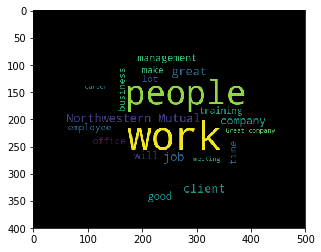

In [17]:
import wordcloud
wc = wordcloud.WordCloud(background_color="black", max_words=20, mask=image,
                           contour_width=10)
img = wc.generate_from_text(string)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)
plt.show()

In [19]:
new_data=[new_data]

In [20]:
new_data

['great company grow got many opportunities get hands various platforms wonderful work different challenging tools technologies typical day busy half day phones sometimes lunch breaks missed training use improvement northwestern mutual tiene un buen producto pero la sucursal adonde trabaje tiene una cultura muy mala s good want commission base salary training sub par re motivated dial constantly work culture best part really enjoyed working northwestern mutual make sure employees well taken care fast paced environment able challenged grow professional knowledge definitely hard work amazing people unbelievable opportunity people looking supported mentored best work culture can imagine job pretty simple knew everything achievable first day good place start working since wasn t much stress get work done extremely fast let work pace left work long well people met kind great people joy around overall bad place work good work life balance customer focus products quite expensive good place re

In [27]:
# Creating sentence tokens and printing the sentences
sentences = nltk.sent_tokenize(text)
for sent in sentences:
    print('\n')
    print(sent)



Great company to grow..,Got many opportunities to get my hands on various platforms..,Wonderful to work on different and challenging tools and technologies.


A typical day is very busy, more than half of the day are on the phones.


Sometimes lunch and breaks had to be missed.


Training could use improvement.


Northwestern <mutual tiene un buen producto pero la sucursal adonde trabaje tiene una cultura muy mala.


It's good if you want commission only and no base salary.


The training is sub par and you're motivated to dial constantly.


The work culture was the best part of being there.


I really enjoyed working at Northwestern Mutual.


They make sure that the employees are well taken care of, it was a fast paced environment, and I was able to be challenged and grow in my professional knowledge.


Definitely hard work,  but such amazing people.


An unbelievable opportunity for people looking to be supported and mentored.


Best work culture I can imagine.


My job here was pr

,This is a opportunity for someone that has a large warm circle and is able to cold call (2-400 dials a day) to build a practice.


,This company wants you to sell LIFE INSURANCE!!


It is NOT a financial services company.


They tell you they are but they are only an insurance company and offer the most basic mutual funds.


Nothing more.,So if you like to be an insurance salesman then this is perfect for you,, if not then stay away!,I was in the Farmingdale location.


The people were cold, there was not any "real" help.


The person dedicated to help me with the submitting of paperwork for policies to the home office, told me to do it on my own and had a nasty attitude at times.


VERY unprofessional lady.


,When you start off, the Sr. Advisor will take HALF of your commission because they"helped" you sell.


There is nothing you can do unless you do a case completely on your own and ON TOP of them taking half your money, your client they helped you with will ALSO become their clie

However the job as a financial representative can be very challenging as it's 100% commission.


Enjoyed working at the agency office,  administrative staff meetings allowed exchange of helpful information and knowledge to improve assisting the financial advisors.


Best work place ive been in so far, competitive but satisfying.


Management is top notch and lots of advancement opportunities.


Also, easy access to leadership Great company to grow..,Got many opportunities to get my hands on various platforms..,Wonderful to work on different and challenging tools and technologies.


Be aware what it means when they say it's commission only.


High level of stress can be seen all over the office.


Upper management cares about their bottom line and how you are making them money.


You can meet some very good people in this company.


The company has does a lot to help you grow and they are a very good employer the culture the is one of helping others.


Good productive family atmosphere 


My manager and I communicated on a daily basis what my every day goals were and weekly goals.


The hardest part was convincing people to talk to my boss about life insurance, especially busy people and people who already had it.


The most enjoyable part of my job was being able to work at my own pace and learning many new skills I was there as an intern to learn about the wealth management business.


I was welcomed with open arms and learned a lot about the company and the business as a whole productive and fast paced environment.


Great way to learn to work independently and as a team.


if you want to learn and grow as a business person and as an advisor it will be an awesome experience This internship was one where I learned a lot about myself as far as balancing work, school, and personal life.


With weekly meetings, we were able to start our days off with goals and keep each other on our toes with competitions.


The people at Northwerstern Mutual are great.


The material c



, It was draining to have to take calls all day and it helped me realize that this is not ideal position for me.


I despise phone positions now.


It was an intense learning experience and I enjoyed my autonomy for my health and well-being.


Northwestern Mutual supports over 10,000 field reps and when I worked there.


God forbids anything breaking because you will be on the phones from the time your shift starts until your shift finishes which could cause mild depression if you come across multiple angry field reps who needed their computer fixed yesterday.,The most enjoyable about this job is the fact that I was able to learn various issues.


It really gave my opportunity to put my brain to work before it got boring.,The down fall is that management just look at SLA stats and nothing else when the decide to promote you which could take up to a year or more.


Even if you are meeting the metrics they will place you in other ques without additional pay.


The turn-around is very h

A typical day involves phoning, scheduling, and meeting with clients.


The firm really focuses on development to help people grow their practice.


Northwestern Mutual is not client focussed.


It is all about selling whole life insurance products.


Whole life is for some people but it is not for everyone.... NM does not understand that.


I loved working for NM, coaching was important to me and I had that available to me at all times.


The also promote professional growth and friendly workplace I felt the the entire premise of the internship was just to generate extra sales for the specific branch.


I didn't receive much guidance and was just told to start making clients on my own.


There was no help or assistance I was just told to come in every day and try to make as many insurance sales that I could.


Normal office hours would be spent calling potential clients.


I personally did not enjoy this, but if you are good at it then it can be very profitable.


I would be required 

Great work environment and culture full of great people and helpful working staff.


Would recommend.


Northwestern Mutual has been around for awhile and their college financial representative internship is rated one of the tops in the country.,It requires you to build a book of business by calling friends, family, past coworkers, etc.


,This can be difficult because most are not going to buy from an intern who are gone after 3 months.


That's where actual associates come in, who go in with you on prospective clients.


They can be helpful, but in the end I think their main goal is to get the client rather than help the college financial rep learn.,I did like the experienced I gained communicating with strangers, but it was certainly frustrating getting rejected so many times.


I was an intern in a branch office.


Good sales experience and was able to get 0215 - Life Insurance Certification.


However, as an intern I felt pressured to sell to my friends and family which I did not 


the management really does try to help you out throughout the entire process.


The training is beyond anywhere else in the industry.


Calling friends and family to get started and working 12 hour days M-Th.


Difficult to to set meetings with people you do and don't know.


It's a very important topic that everyone needs to look into but a lot of people don't care.


The culture is cut throat and dull.


Everyone is just out for themselves because that is how Northwestern Mutual's business model is set up.


Only 1 out of 10 agents make it two years.


The biggest hurdle is to mentally deal with the constant rejection every day.


The benefit is knowing when someone meets with you, they learned something new and that you made a financial impact in their lives.


It was decent.


Insurance is a tough business.


I wouldn't recommend this job to anyone who isn't willing to work extremely hard or that doesn't want to push family and friends to buy insurance.


Great company to grow..,G



Everyone was willing to go out of there way to provide advice, guidance, or join you on meetings.


Great place to learn.


Northwestern Mutual is a great company for the client but tough for the adviser to get off to a great start.


Nothing but very high quality people that work there.


Overall great company.


Fast paced, competitive and somewhat stressful, but positives far out weigh negatives.


I only left because I was recruited by my former employer and manager to help build a new department and was a great opportunity.


At the time of entry into the industry the market share was poor.


The company and training was great for an insurance and financial services company.


I learned a lot about the financial services, such as dealing with insurance policies and investments.


Management was decent but there wasn't much culture.


Management expects you to create your own leads and was only helpful the first few times you request help.


If on those times you weren't able to 

My position was based on full commission with little knowledge of the service I was selling.


My position also provided only three weeks of training.


After training I mainly focused on building my clientele from the ground up.


If I didn't have any clientele, I didn't receive income.


There was hardly any management or guidance throughout the work day.


I was mostly on my own with no set schedule.


Low income, straight commission and no set working hours were the hardest part of the job.


Companionship and teamwork with my co-workers was the most enjoyable part of the job.


Currently I am positioned as a Financial Representative Assistant which includes creating Life and Disability applications, running ledgers and reports for client meetings, answering phones, prepping PDA's and policy packets to be mailed or hand delivered along with other office type duties.


The workplace is supportive for the purpose of any new hire.


The learning curves are steady and the location is n

Referrals are key.


Great organization for those willing to pick up the phone and try and set meetings with friends and family.


That part of the job was a major turn off for me.


During the interview process I was told I would be calling on them and I thought nothing of it.


After a few sales calls to them though, I realized how much it bothered me personally.


Working at NM can be very rewarding down the road, but lasting over one year is the real challenge.


Unless you have enough money stock piled to last you a few months, I would never recommend.


Great company to grow..,Got many opportunities to get my hands on various platforms..,Wonderful to work on different and challenging tools and technologies.


Starting this job is a sales role.


People are pushing Life Insurance since that is the company's bread and butter.


Takes a ton of work and a significant amount of luck to advance to the levels of advisor.


Working at Northwestern Mutual taught me the value of helping ot


Business model is set up to build book of business off of friends, family, and close network.


Prior to pursuing be sure you understand your foothold on your network.


You will not succeed if you are unable to 1. produce from your existing network 2. are unable to expand and build diversified network.


Maintain high energy level and hit the ground running.


Regaining momentum is extremely challenging.


You lose traction and you will fail.


Do not fall behind on administrative business practices or technology.


Difficult to receive clear path(s) forward.


Do not wait for someone to get back with you.


Must be diligent and hammer shared services and admin all day every day.


Love working at Northwestern Mutual.


People working there are highly ethical as well as super smart.


It is a mission driven organization that truly cares about clients and the community.


Northwestern Mutual was a nice place to work.


The people there were great to work with!


There is room for adva



Mcdonalds as everyone should know is a very big player in the fast food market.


The job I had was line cook so you had to be quick on your feet to fulfill orders.


Also ability to adapt to surroundings.


Typical day at work: Meeting at 7 or 7:30am.


Calling people from 9am-10am.


Meeting with potential clients from 10:30am-5pm.


Posting your productivity from 5-6 pm.


,I learned how to educate and help others with comprehensive financial planning.


(Risk management, wealth accumulation, and wealth preservation and distribution),Management was great.


Very encouraging and helpful.,Hardest part of the job was finding people willing to meet with a 22 year old to talk about financial planning.


,The most enjoyable part of the job was having success with your clients and closing deals.


Pure sales, nothing more.


If the grind is for you then it should work out beautifully.


Locally some branches are better than others, managing directors being the difference.


Good managing

With out much guidance you are thrown in blind and need to hustle to get new clients.


Although everyone who worked there was very friendly and seemed like a little family, it was hard coming in when you aren't referred by a current employee.


Your day will be calling prospective for a few hours then setting up meetings and going out to meet with them.


What they need to do during the interview is reiterate that it is solely based off commission.


My boss created his own schedule and set up meetings with clients on his own time.


I strived to work under a similar situation.


Working at Northwestern Mutual taught me how to be effective with time management, customer relationship management, and sales.


The support I received from my boss and my co-workers allowed me to become the most effective new intern for the summer out of a group of 6.


Great company to work for if you enjoy the sales process.


Great working environment and almost total control over daily schedule.


Eat w

In [24]:
sentences=[sentences]

In [43]:
x = TfidfVectorizer()
x.fit(new_data)
all_texts_summary = [text[:20] for text in new_data]
tfidf = x.transform(new_data)
pd.DataFrame(tfidf.todense())

,0,1,2,3,4,5,6,7,8,9,...,4958,4959,4960,4961,4962,4963,4964,4965,4966,4967
0,0.000331,0.000331,0.000331,0.000331,0.000993,0.0096,0.037406,0.000662,0.000331,0.000662,...,0.000993,0.012248,0.002648,0.000331,0.001324,0.000331,0.000331,0.001986,0.004303,0.000331


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time
print("Extracting tf-idf features...")
# Creating the ti-idf matrix with min 3 characters in a word (excluding numbers)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3),token_pattern= r'[a-zA-Z]{3,}', max_features=10000)#max_df=0.95, min_df=2, stop_words='english' #USE HELP TO SEE WHAT EACH DOES)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(new_data)
print("done in %0.3fs." % (time() - t0))

Extracting tf-idf features...
done in 0.881s.


In [ ]:
tfidf

In [29]:
dense = tfidf.todense()
dense.shape
type(dense)

numpy.matrixlib.defmatrix.matrix

In [35]:
dense

matrix([[0.0009543 , 0.00922489, 0.0012724 , ..., 0.0006362 , 0.0019086 ,
         0.00413529]])

In [30]:
# randomly check what features you extracted
l=tfidf_vectorizer.get_feature_names()
l[10:15]


['able create', 'able find', 'able get', 'able help', 'able learn']

In [38]:
# Creating cluster using the kmeans
from sklearn.cluster import KMeans
model=KMeans(n_clusters=1,init='k-means++')
model_=model.fit(tfidf)
labels=model_.labels_
len(labels)
print(labels)

[0]


In [ ]:
# Creating sentence tokens and printing the sentences
sentences = nltk.sent_tokenize(text)
for sent in sentences:
    print('\n')
    print(sent)

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [28]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sentences)


In [29]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 work
 great
 company
 northwestern
 mutual
 good
 financial
 place
 management
 insurance
Cluster 1:
 job
 people
 great
 work
 hardest
 enjoyable
 good
 commission
 help
 working


Prediction
